In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Rainfall prediction/weatherAUS.csv")
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3



# DATA VISUALIZATION AND CLEANING


<Axes: xlabel='RainTomorrow', ylabel='count'>

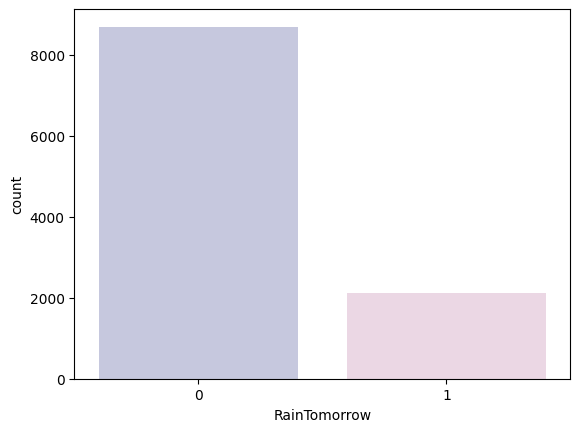

In [37]:
#Checking to see if coulumns are imbalanced
# Define the colors for the count plot
colors = ["#C2C4E2", "#EED4E5"]

# Create a count plot to check for imbalance in the "RainTomorrow" column of the 'data' dataframe
sns.countplot(x=data["RainTomorrow"], palette=colors)

<ipython-input-38-209cf084ce55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

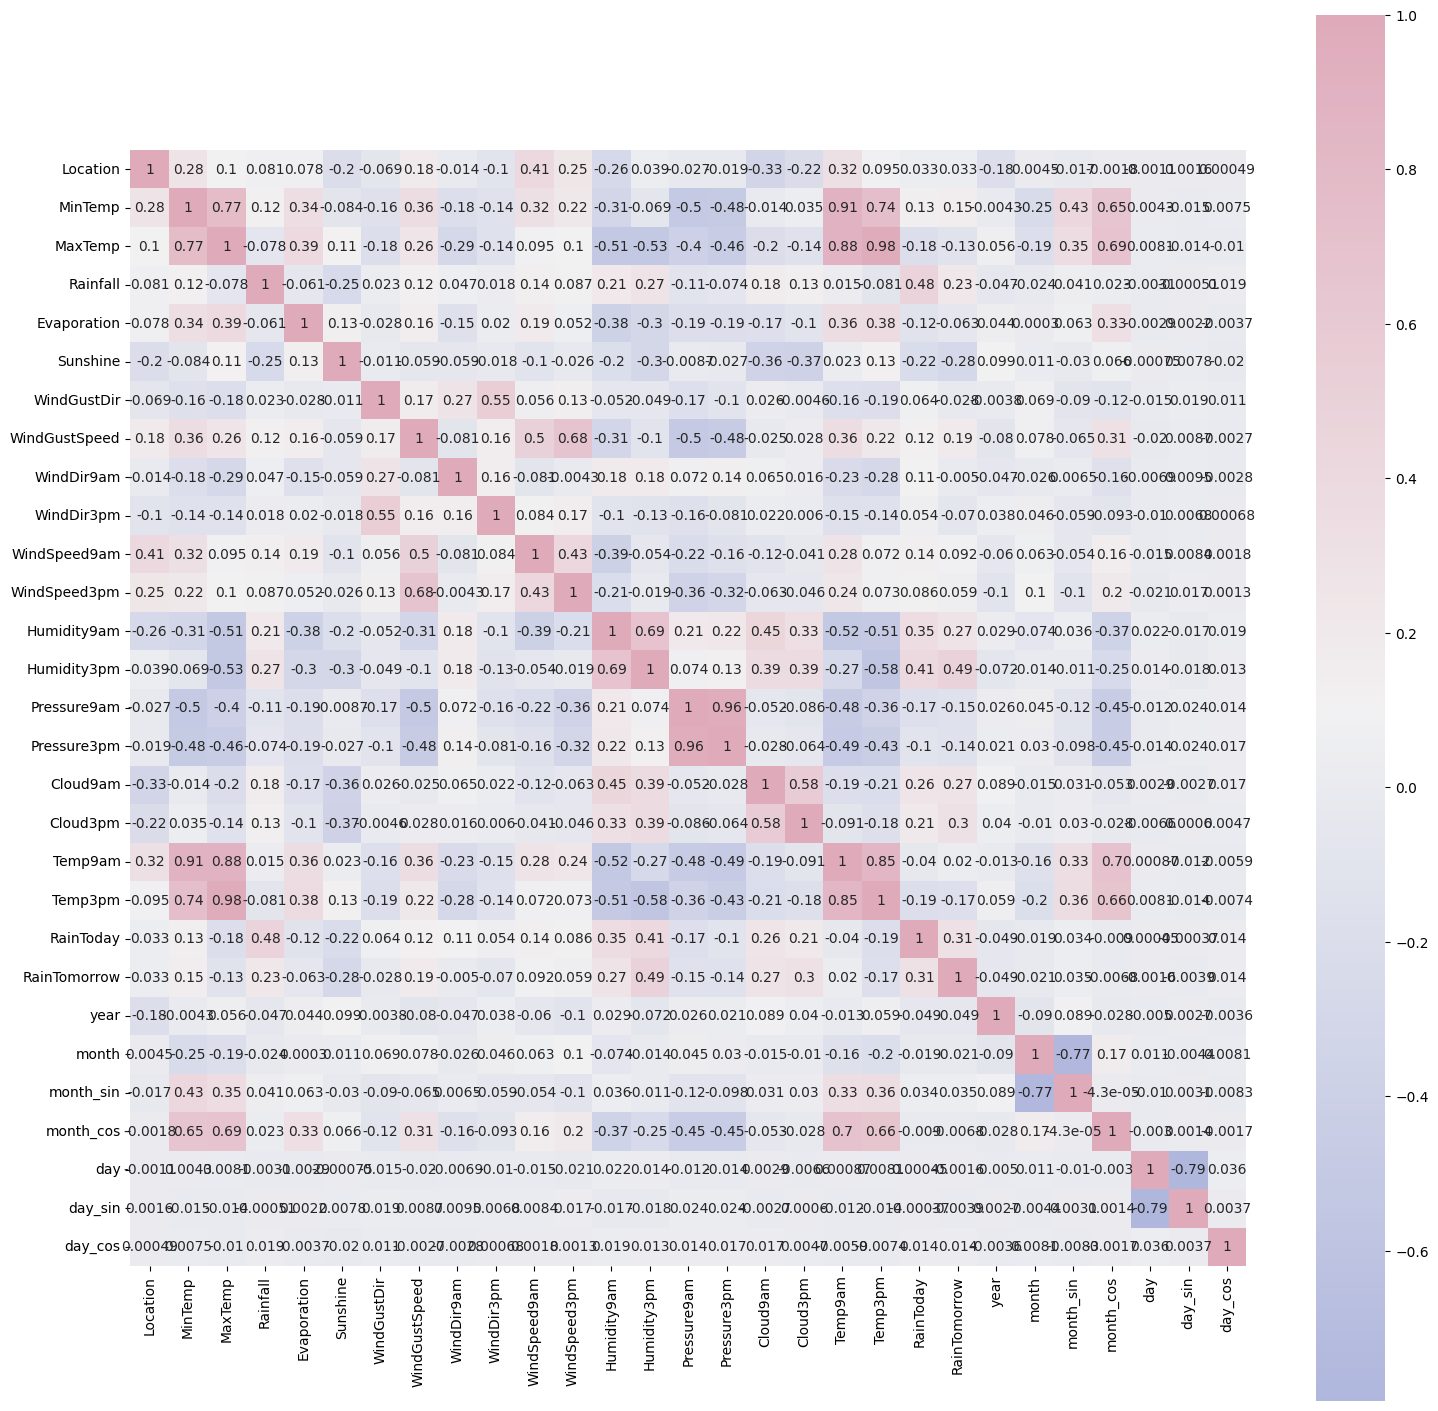

In [38]:
# Calculate the correlation matrix for the numeric attributes in the 'data' dataframe
corrmat = data.corr()

# Define a diverging color palette for the heatmap
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)

# Set the size of the heatmap
plt.subplots(figsize=(18, 18))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)


In [12]:
data['Date']= pd.to_datetime(data["Date"])
data['year'] = data.Date.dt.year

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

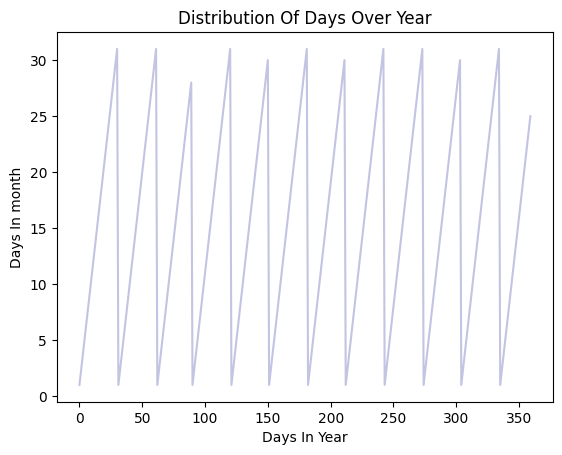

In [13]:
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

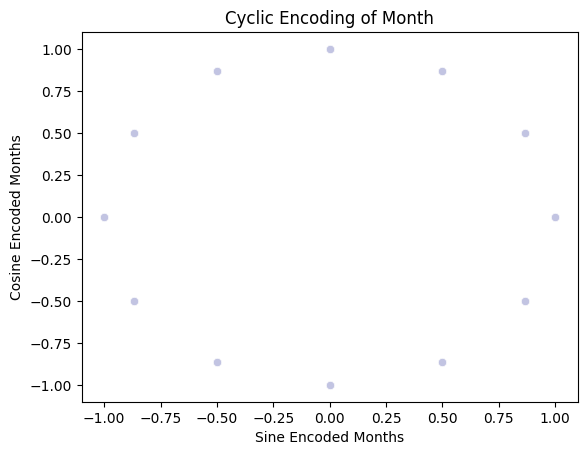

In [14]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")


Text(0.5, 0, 'Sine Encoded Day')

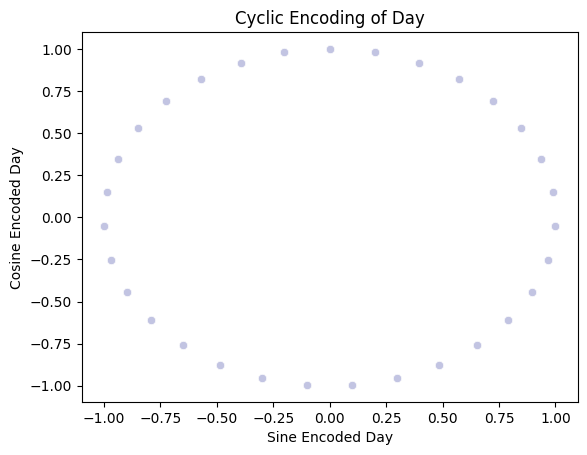

In [15]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [16]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 187
WindDir9am 1025
WindDir3pm 154
RainToday 136
RainTomorrow 136


In [18]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [19]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [20]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 54
MaxTemp 45
Rainfall 135
Evaporation 6454
Sunshine 8806
WindGustSpeed 187
WindSpeed9am 81
WindSpeed3pm 77
Humidity9am 195
Humidity3pm 201
Pressure9am 212
Pressure3pm 216
Cloud9am 5156
Cloud3pm 4954
Temp9am 61
Temp3pm 64
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [21]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10811 non-null  datetime64[ns]
 1   Location       10811 non-null  object        
 2   MinTemp        10811 non-null  float64       
 3   MaxTemp        10811 non-null  float64       
 4   Rainfall       10811 non-null  float64       
 5   Evaporation    10811 non-null  float64       
 6   Sunshine       10811 non-null  float64       
 7   WindGustDir    10811 non-null  object        
 8   WindGustSpeed  10811 non-null  float64       
 9   WindDir9am     10811 non-null  object        
 10  WindDir3pm     10811 non-null  object        
 11  WindSpeed9am   10811 non-null  float64       
 12  WindSpeed3pm   10811 non-null  float64       
 13  Humidity9am    10811 non-null  float64       
 14  Humidity3pm    10811 non-null  float64       
 15  Pressure9am    1081

Text(0.5, 0, 'Years')

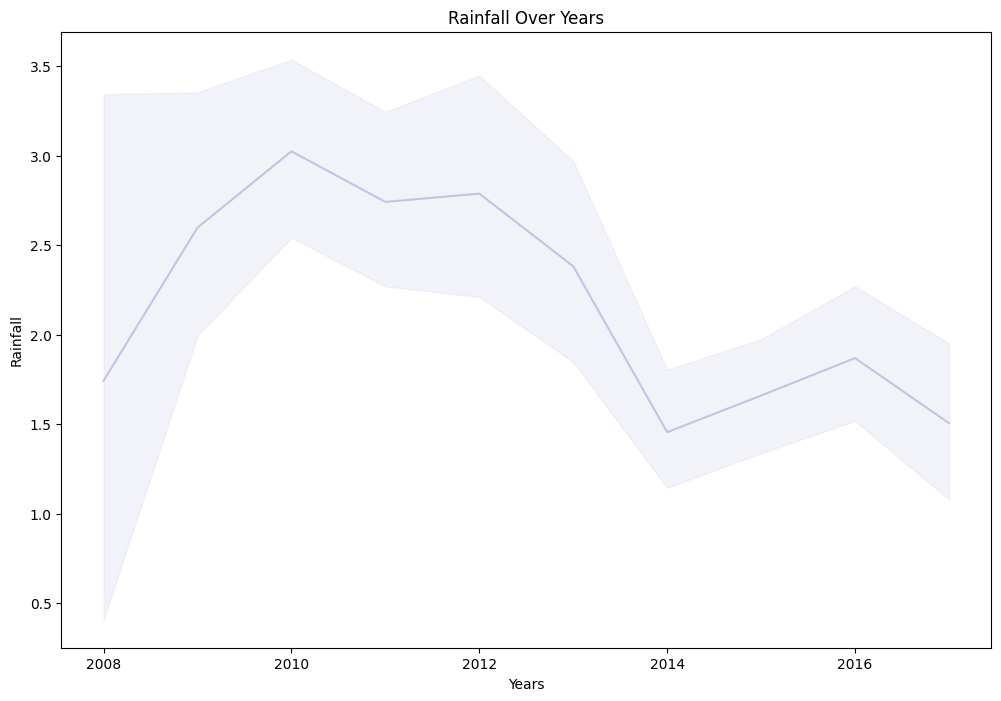

In [22]:
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

<ipython-input-23-574ace62e91a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)


Text(0.5, 0, 'Year')

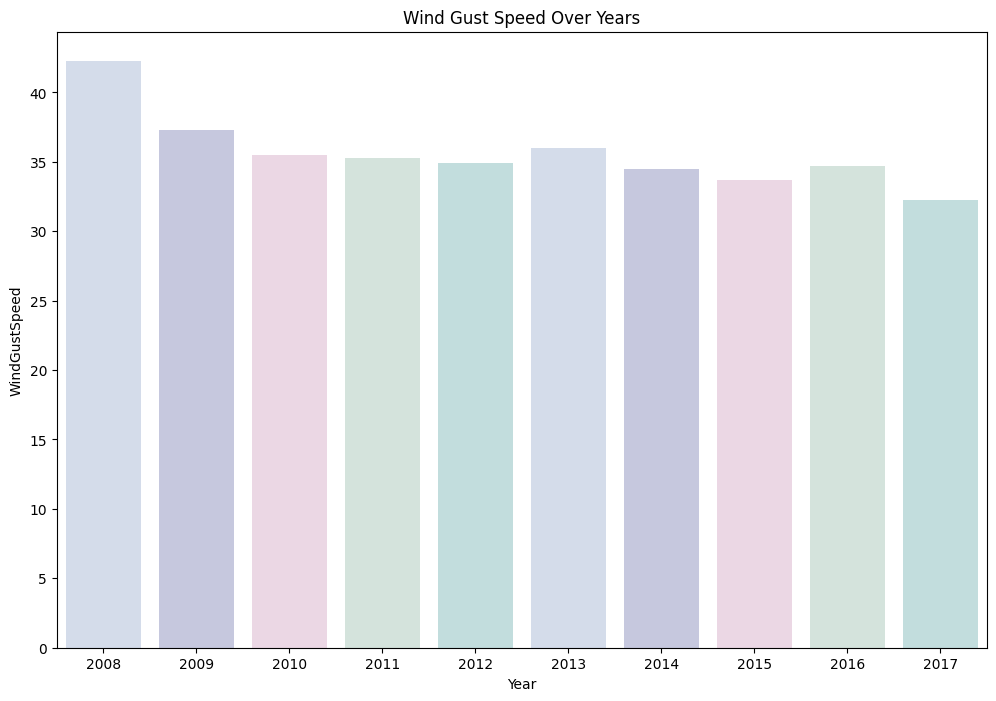

In [23]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")


# DATA PREPROCESSING


In [24]:
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10811 non-null  datetime64[ns]
 1   Location       10811 non-null  int64         
 2   MinTemp        10811 non-null  float64       
 3   MaxTemp        10811 non-null  float64       
 4   Rainfall       10811 non-null  float64       
 5   Evaporation    10811 non-null  float64       
 6   Sunshine       10811 non-null  float64       
 7   WindGustDir    10811 non-null  int64         
 8   WindGustSpeed  10811 non-null  float64       
 9   WindDir9am     10811 non-null  int64         
 10  WindDir3pm     10811 non-null  int64         
 11  WindSpeed9am   10811 non-null  float64       
 12  WindSpeed3pm   10811 non-null  float64       
 13  Humidity9am    10811 non-null  float64       
 14  Humidity3pm    10811 non-null  float64       
 15  Pressure9am    1081

In [25]:
features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,10811.0,8.412679e-17,1.000046,-1.257194,-1.257194,-0.305806,0.645581,1.596969
MinTemp,10811.0,6.309509e-17,1.000046,-2.367066,-0.794307,-0.007927,0.794501,2.880815
MaxTemp,10811.0,1.603667e-16,1.000046,-2.483526,-0.774209,-0.070373,0.676555,3.233348
Rainfall,10811.0,3.154755e-17,1.000046,-0.244052,-0.244052,-0.244052,-0.217835,38.662220
Evaporation,10811.0,4.732132e-16,1.000046,-1.594777,-0.161347,-0.161347,-0.161347,26.487422
Sunshine,10811.0,-7.781728e-16,1.000046,-5.141485,0.129791,0.129791,0.129791,3.031953
WindGustDir,10811.0,-5.520820e-17,1.000046,-1.673771,-0.844860,0.191280,0.812964,1.434647
WindGustSpeed,10811.0,-1.367060e-16,1.000046,-2.260208,-0.577410,-0.176744,0.624589,5.753116
WindDir9am,10811.0,1.735115e-16,1.000046,-1.807219,-0.923903,0.180242,0.842729,1.505216
WindDir3pm,10811.0,-7.886886e-17,1.000046,-1.641916,-0.780312,0.081291,0.942894,1.589096


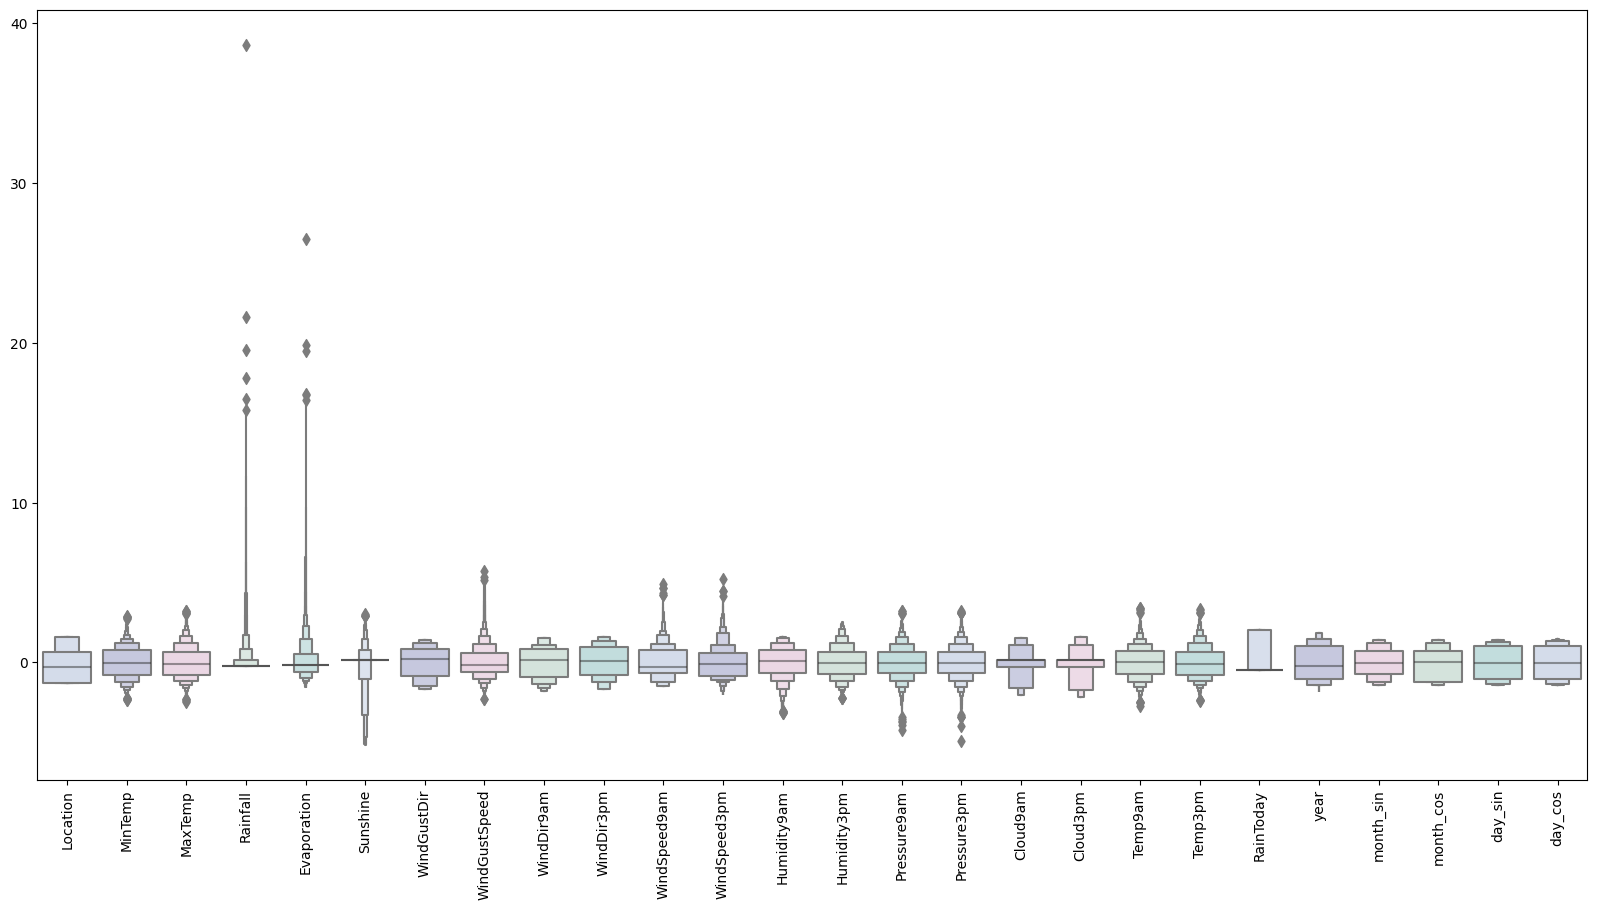

In [26]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [27]:

features["RainTomorrow"] = target



features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(9445, 27)

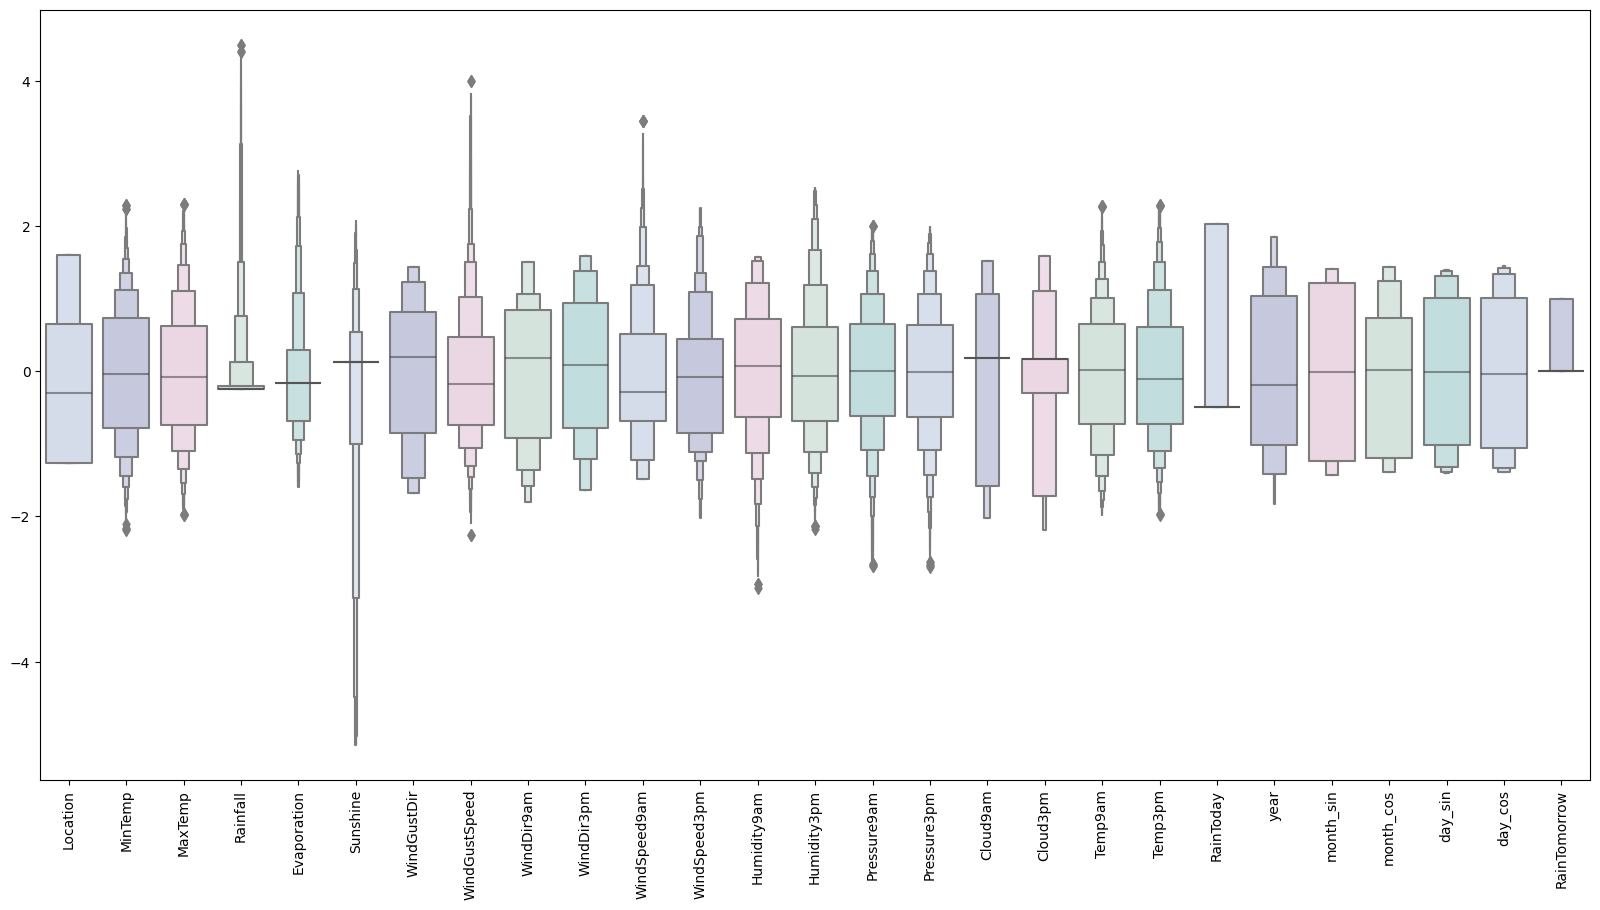

In [28]:


plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Looks Good. Up next is building artificial neural network.



# MODEL BUILDING




In [29]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(9445, 26)

In [30]:

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


model = Sequential()



model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
189/189 [==============================] - 5s 6ms/step - loss: 0.6899 - accuracy: 0.8072 - val_loss: 0.6856 - val_accuracy: 0.8108
Epoch 2/150
189/189 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.8092 - val_loss: 0.6162 - val_accuracy: 0.8108
Epoch 3/150
189/189 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.8092 - val_loss: 0.4238 - val_accuracy: 0.8108
Epoch 4/150
189/189 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8092 - val_loss: 0.3813 - val_accuracy: 0.8108
Epoch 5/150
189/189 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8092 - val_loss: 0.3693 - val_accuracy: 0.8108
Epoch 6/150
189/189 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8092 - val_loss: 0.3619 - val_accuracy: 0.8108
Epoch 7/150
189/189 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8092 - val_loss: 0.3559 - val_accuracy: 0.8108

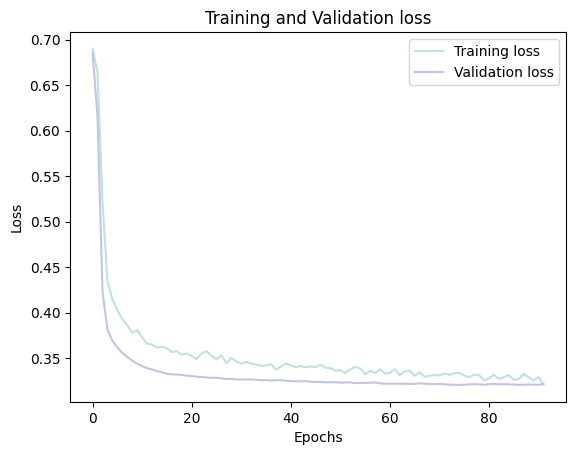

In [31]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

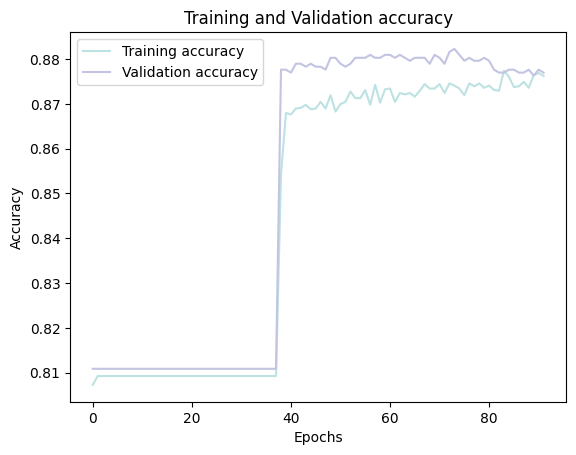

In [32]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# CONCLUSIONS



In [33]:

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

60/60 [==============================] - 0s 2ms/step


<Axes: >

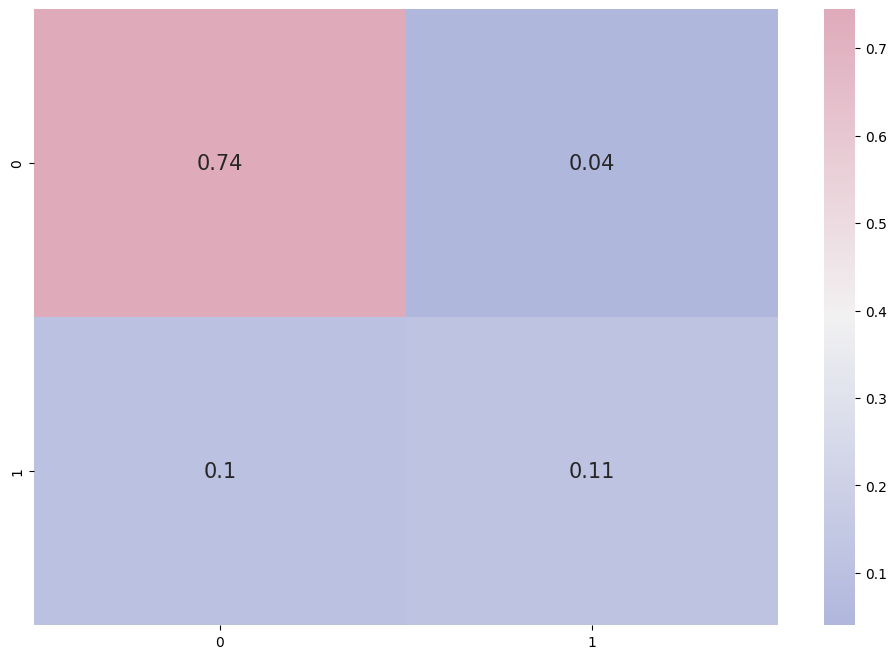

In [34]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1482
           1       0.74      0.53      0.61       407

    accuracy                           0.86      1889
   macro avg       0.81      0.74      0.76      1889
weighted avg       0.85      0.86      0.85      1889

